In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import kalman

# パラメータ設定
T = 1000  # データの長さ
a = -0.5  # AR(1)過程のパラメータ
su = 5
sw = 5

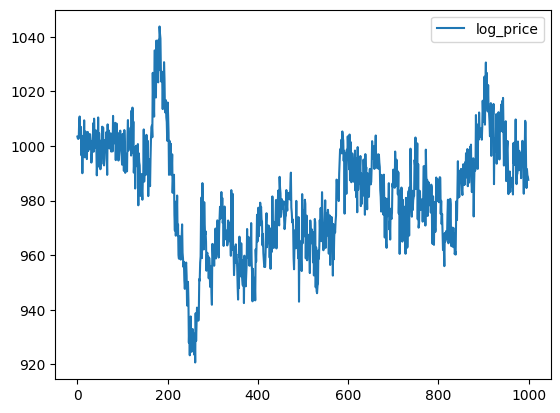

In [3]:
# データ生成
df = kalman.data_gen(a, su, sw, T, True)

In [4]:
df["cci"] = (df["log_price"] - df["log_price"].rolling(30).mean())/(df["log_price"].rolling(30).std())

<Axes: >

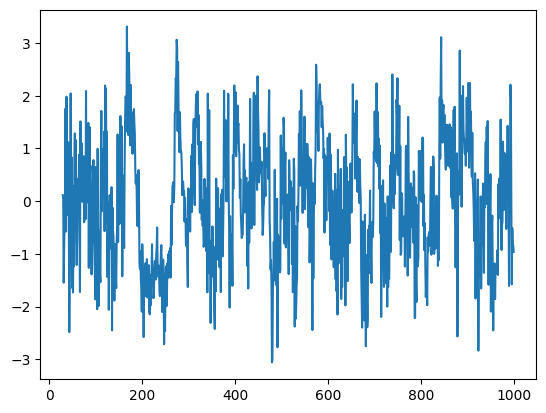

In [5]:
df["cci"].plot()

In [6]:
df["long_entry"] = (df["cci"] < -2)
df["short_entry"] = (df["cci"] > 2)

df["long_close"] = (df["cci"] > 1)
df["short_close"] = (df["cci"] < -1)

df["long_ret"] = 0.
pos = 0
for i, (idx, entry, close, ret) in enumerate(zip(df.index, df["long_entry"], df["long_close"], df["log_price"].diff().fillna(0))):
    df.loc[idx,"long_ret"] = ret*pos
    if entry:
        pos += 1
    if close:
        pos = 0


df["short_ret"] = 0.
pos = 0
for i, (idx, entry, close, ret) in enumerate(zip(df.index, df["short_entry"], df["short_close"], df["log_price"].diff().fillna(0))):
    df.loc[idx,"short_ret"] = -ret*pos
    if entry:
        pos += 1
    if close:
        pos = 0

df["both_ret"] = df["short_ret"] + df["long_ret"]

<Axes: >

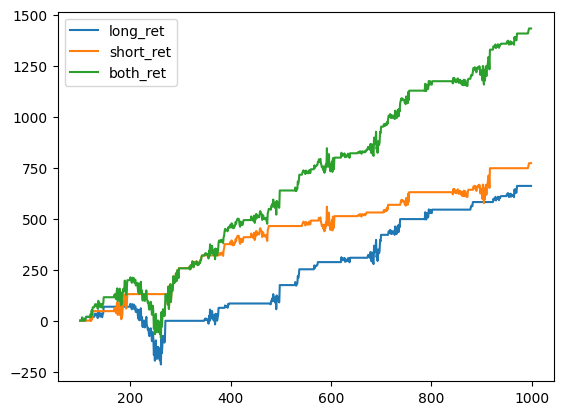

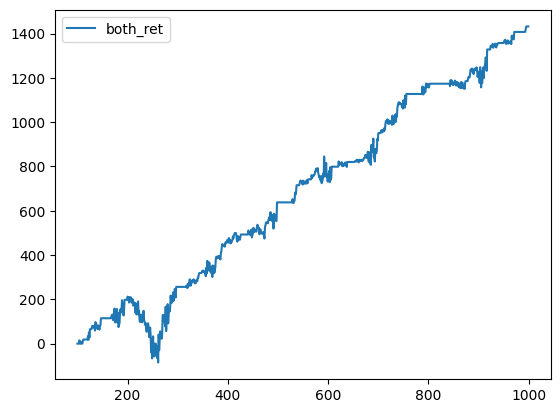

In [7]:
# 可視化
df[["long_ret","short_ret", "both_ret"]].iloc[100:].cumsum().plot()
df[["both_ret"]].iloc[100:].cumsum().plot()